In [17]:
import numpy as np
import yfinance as yf
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt
from pathlib import Path

In [18]:
path_to_file = Path().cwd().parent / 'data' / 'win.csv'
df = pd.read_csv(path_to_file, index_col='time')

In [19]:
df['mah'] = ta.SMA(df['high'], timeperiod=5)
df['mal'] = ta.SMA(df['low'], timeperiod=5)
df['mat'] = ta.SMA(df['close'], timeperiod=21)
df['mat_diff'] = df['mat'].diff()
df["return"] = df['close'].pct_change()

df.dropna(inplace=True)

In [20]:
df['entry_signal'] = np.zeros(len(df))
df.loc[(df['mat_diff'] > 0) & (df['close'] < df['mal']), 'entry_signal'] = 1
df.loc[(df['mat_diff'] < 0) & (df['close'] > df['mah']), 'entry_signal'] = -1

n_entradas = len(df.loc[df['entry_signal'] == 1.0])
n_saidas = len(df.loc[df['entry_signal'] == -1.0])
print('Entradas: ', n_entradas)
print('Saidas: ', n_saidas)

Entradas:  1357
Saidas:  1450


In [21]:
one_day = df.loc['2023-09-12 09:00:00':'2023-09-12 17:50:00']

In [22]:
profits = []
row_interator = df.iterrows()
lot = 5
mini_indice = 0.2
stop_loss = 350.0

for i, row in row_interator:
    if row['entry_signal'] == 1:
        entry_price = row['close']
        exit_price = None
        long = True
        while long:
            i, act_row = next(row_interator)
            # if (entry_price - act_row['close']) * 0.2 * lot >= stop_loss:
            #     profits.append(-stop_loss)
            #     long = False
            if act_row['close'] > act_row['mah']:
                exit_price = act_row['close']
                profits.append((exit_price - entry_price) * 0.2 * lot)
                long = False
            
    elif row['entry_signal'] == -1:
        entry_price = row['close']
        exit_price = None
        short = True
        while short:
            i, act_row = next(row_interator)
            # if (act_row['close'] - entry_price) * 0.2 * lot >= stop_loss:
            #     profits.append(-stop_loss)
            #     short = False
            if act_row['close'] < act_row['mah']:
                exit_price = act_row['close']
                profits.append((entry_price - row['close']) * 0.02 * 5)
                short = False

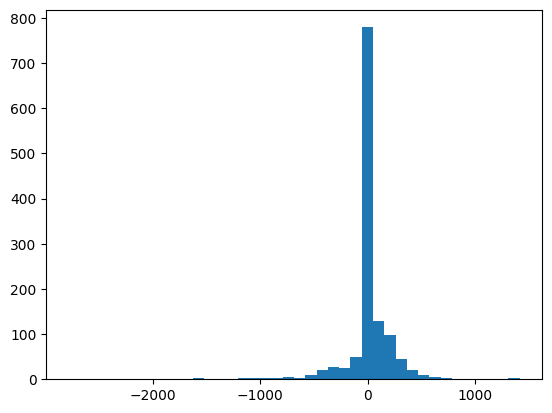

In [23]:
plt.hist(profits, bins=40);

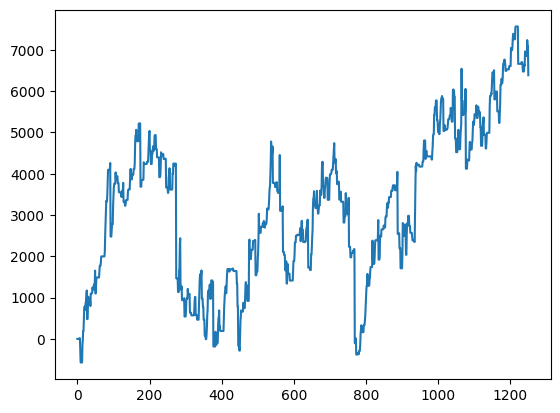

In [24]:

plt.plot(np.array(profits).cumsum())